# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀
                    - 라쏘 회귀
                    - 엘라스틱넷 회귀
                - 비선형회귀
                    - 다항회귀(polynomial regression)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집
                - 비계층적군집
                - 혼합분포군집
            - 연관분석(장바구니분석)
    - 비정형데이터분석
        - 텍스트마이닝
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE
- 모델 성능 개선

type=<class 'pandas.core.frame.DataFrame'>, data shape=(569, 30), target shape=(569,)
x_train=455, x_test=114, y_train=455, y_test=114
train set accuracy=1.000
test set accuracy=0.947


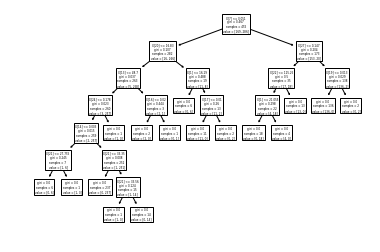

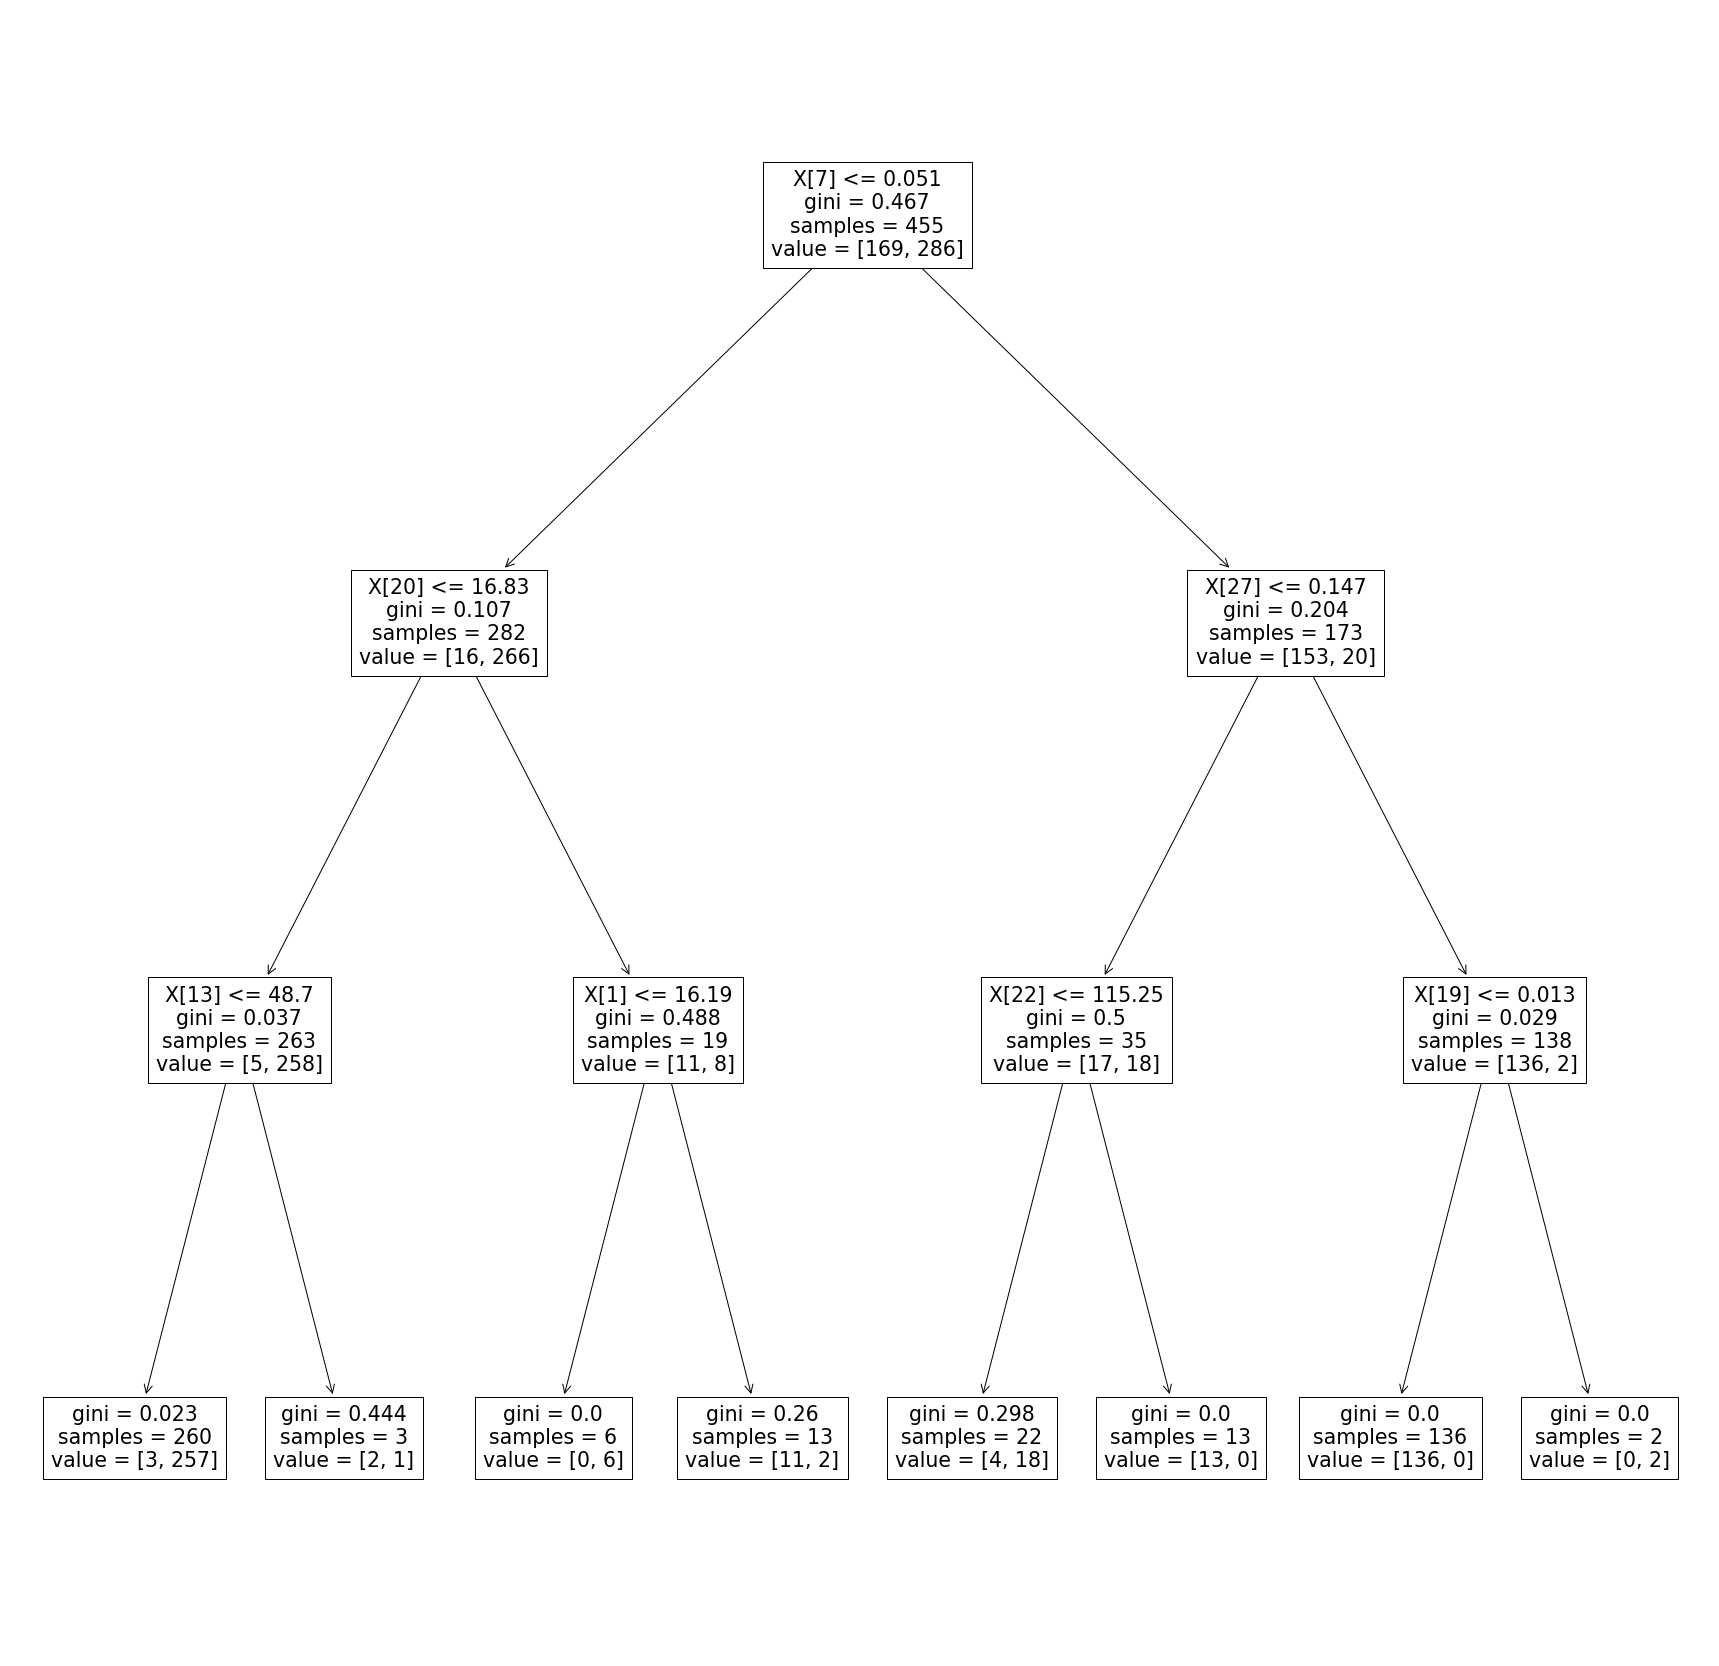

train set accuracy=0.978
test set accuracy=0.947


array([0.        , 0.03010577, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75230354, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01303772, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02018831,
       0.05690456, 0.        , 0.05602834, 0.        , 0.        ,
       0.        , 0.        , 0.07143177, 0.        , 0.        ])

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn import tree

# 데이터 수집
# as_frame은 디폴트가 False이며, True로 해야만 data.frame로 pandas 데이터 프레임 추출 가능
# return_X_y값은 디폴트가 False이며, True로 해야만 입력, 종속변수를 파이썬 객체로 획득 가능
raw_data = datasets.load_breast_cancer(as_frame = True)

# pandas 데이터프레임 획득
df_data = raw_data.data
df_target = raw_data.target

# 행과 열수 확인(index가 있으면 열수에서는 제외됨에 주의)
print(f"type={type(df_data)}, data shape={df_data.shape}, target shape={df_target.shape}")

# 데이터 일부 확인
# print(df_data.head())

# 데이터 탐색 및 준비
# 단순 회귀 분석 수행 준비
# 홀드아웃 방식 데이터 분할 = train : test = 8 : 2
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    df_data # 독립 변수
    , df_target # 종속 변수
    , train_size = 0.8 # 훈련 데이터 개수
    , test_size = 0.2 # 테스트 데이터 개수
    , random_state=42
)

print(f"x_train={len(x_train)}, x_test={len(x_test)}, y_train={len(y_train)}, y_test={len(y_test)}")

# 모델 훈련
# DecisionTreeClassifier 에 최대 깊이 설정이 없다면 훈련 데이터 셑의 정확도는 100프로가됨(과대 적합)
tree_classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(x_train, y_train)

# 0.21 버전 이상에서 plot_tree 함수로 트리 시각화 가능
tree.plot_tree(decision_tree = tree_classifier)

print(f"train set accuracy={tree_classifier.score(x_train, y_train):0.3f}")
print(f"test set accuracy={tree_classifier.score(x_test, y_test):0.3f}")

# 모델 성능 개선
# max_depth를 조정해서 트리 생성을 일찍 중단(pre-pruning, 사전가지치기)
tree_classifier = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_classifier.fit(x_train, y_train)

# 0.21 버전 이상에서 plot_tree 함수로 트리 시각화 가능
plt.figure(figsize=(30,30))
tree.plot_tree(decision_tree = tree_classifier)
plt.show()

print(f"train set accuracy={tree_classifier.score(x_train, y_train):0.3f}")
print(f"test set accuracy={tree_classifier.score(x_test, y_test):0.3f}")

# 학습한 결정트리 모형에서 변수(특성)의 중요도 정보를 추출 가능
# 특성별 중요도의 합이 1이고, 1에 가까울 수록 타깃 클래스 예측에 많이 기여했다는 의미
tree_classifier.feature_importances_
